# Milk Quality Prediction

### Introduction :
Build a model that will classify quality of milk into 3 types i.e. low, medium & high. 
Use different classifiers, calculate their accuracy & state which Model will be fit for classification of " Quality of Milk ".

In [1]:
# Import required libraries
import pandas  as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc


In [2]:
df = pd.read_csv("milk_data.csv")

In [3]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [5]:
df.duplicated().sum()

976

In [6]:
df = df.drop_duplicates()

In [7]:
df.nunique()

pH            16
Temprature    17
Taste          2
Odor           2
Fat            2
Turbidity      2
Colour         9
Grade          3
dtype: int64

In [8]:
df.corr()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
pH,1.000000,0.276312,0.004529,0.035984,-0.056062,0.065126,-0.090947
Temprature,0.276312,1.000000,0.016413,-0.002800,0.034489,0.150841,-0.030160
Taste,0.004529,0.016413,1.000000,-0.014831,0.359513,0.010545,-0.062734
Odor,0.035984,-0.002800,-0.014831,1.000000,0.257576,0.381837,-0.072173
Fat,-0.056062,0.034489,0.359513,0.257576,1.000000,0.164585,0.093818
Turbidity,0.065126,0.150841,0.010545,0.381837,0.164585,1.000000,0.051957
Colour,-0.090947,-0.030160,-0.062734,-0.072173,0.093818,0.051957,1.000000


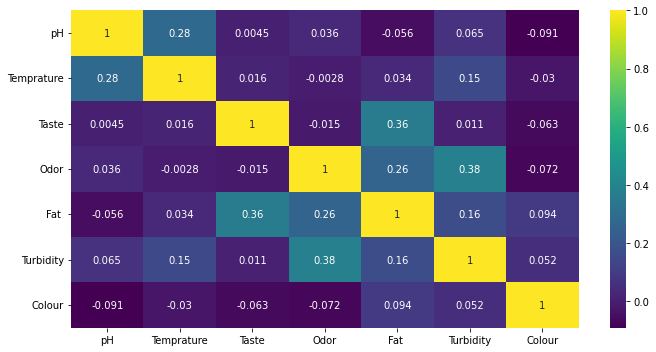

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True, cmap="viridis")
plt.tight_layout()
plt.show()

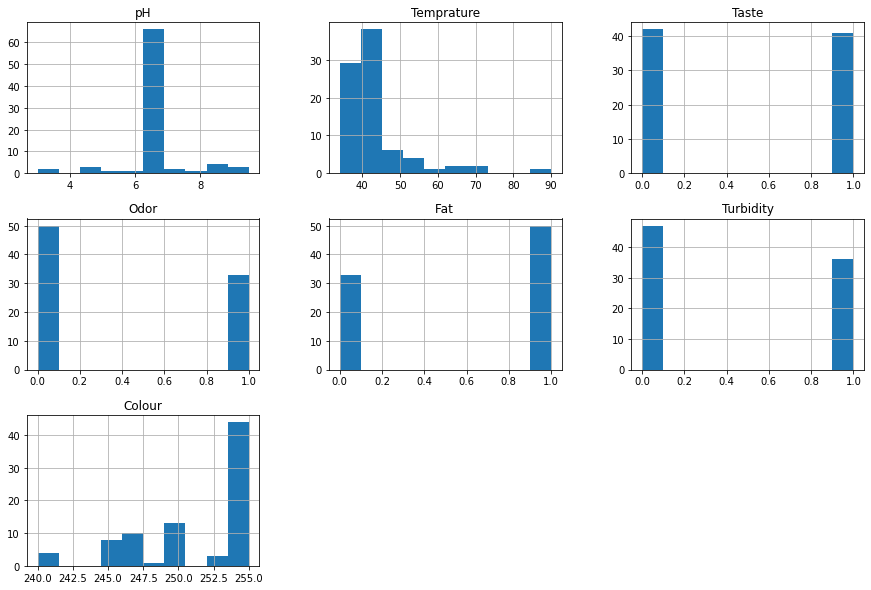

In [10]:
df.hist(figsize=(15,10))
plt.show()

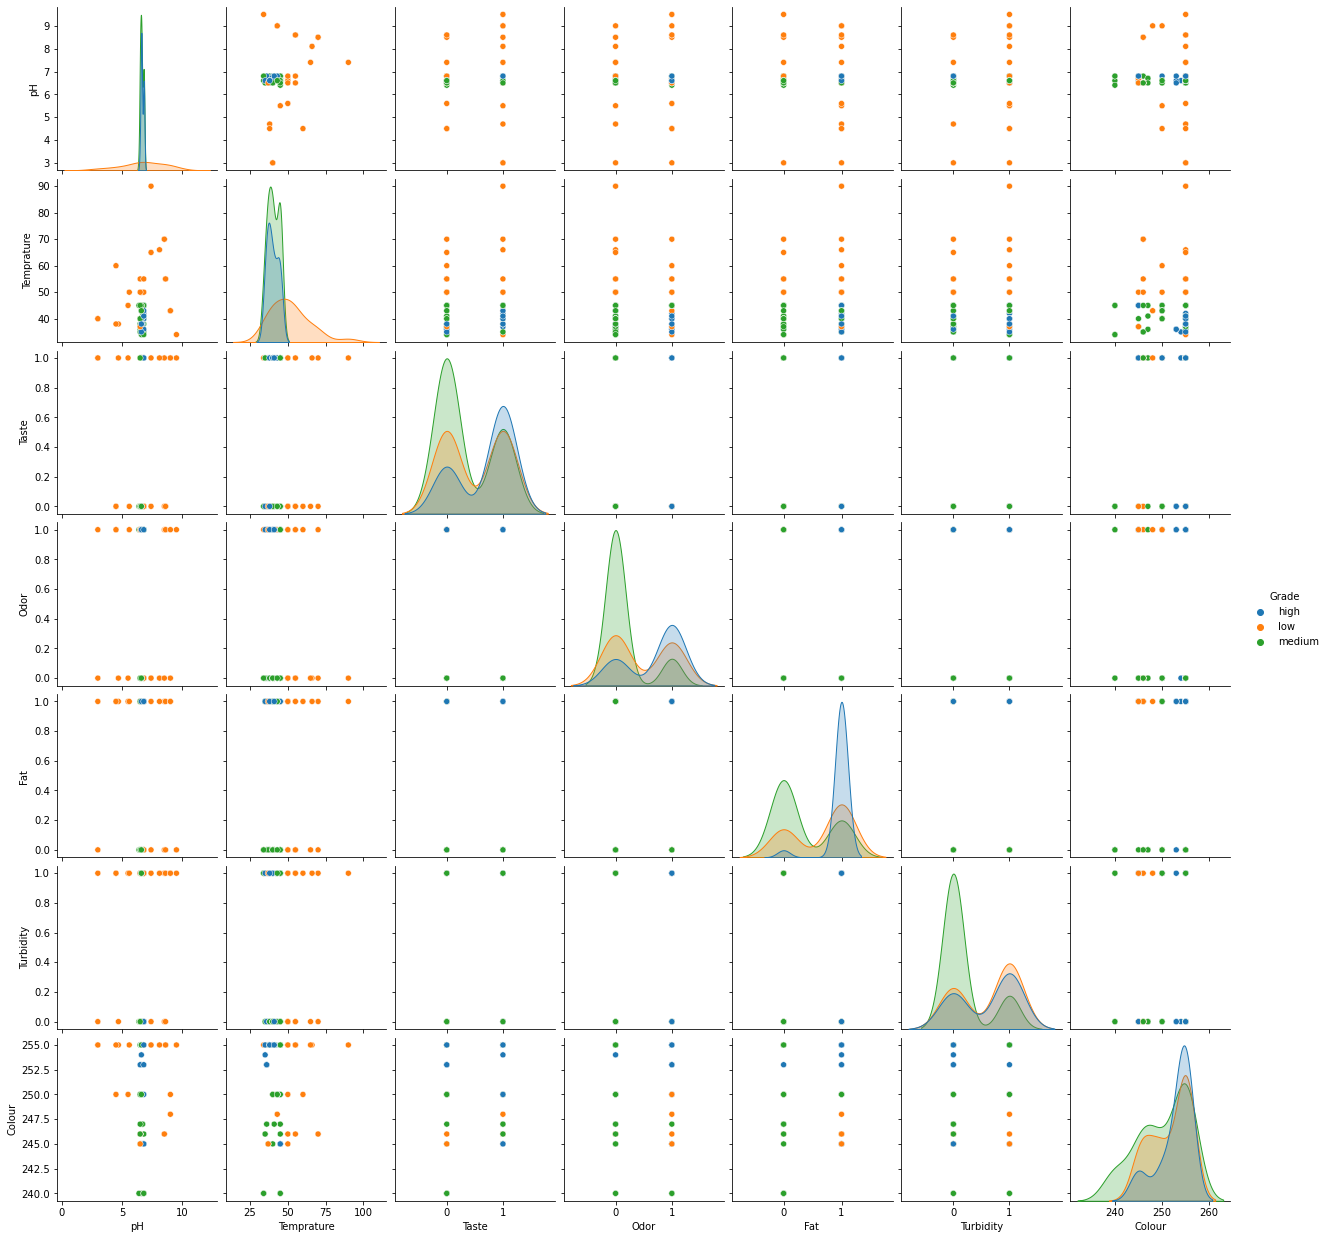

In [11]:
sns.pairplot(data=df, hue="Grade")

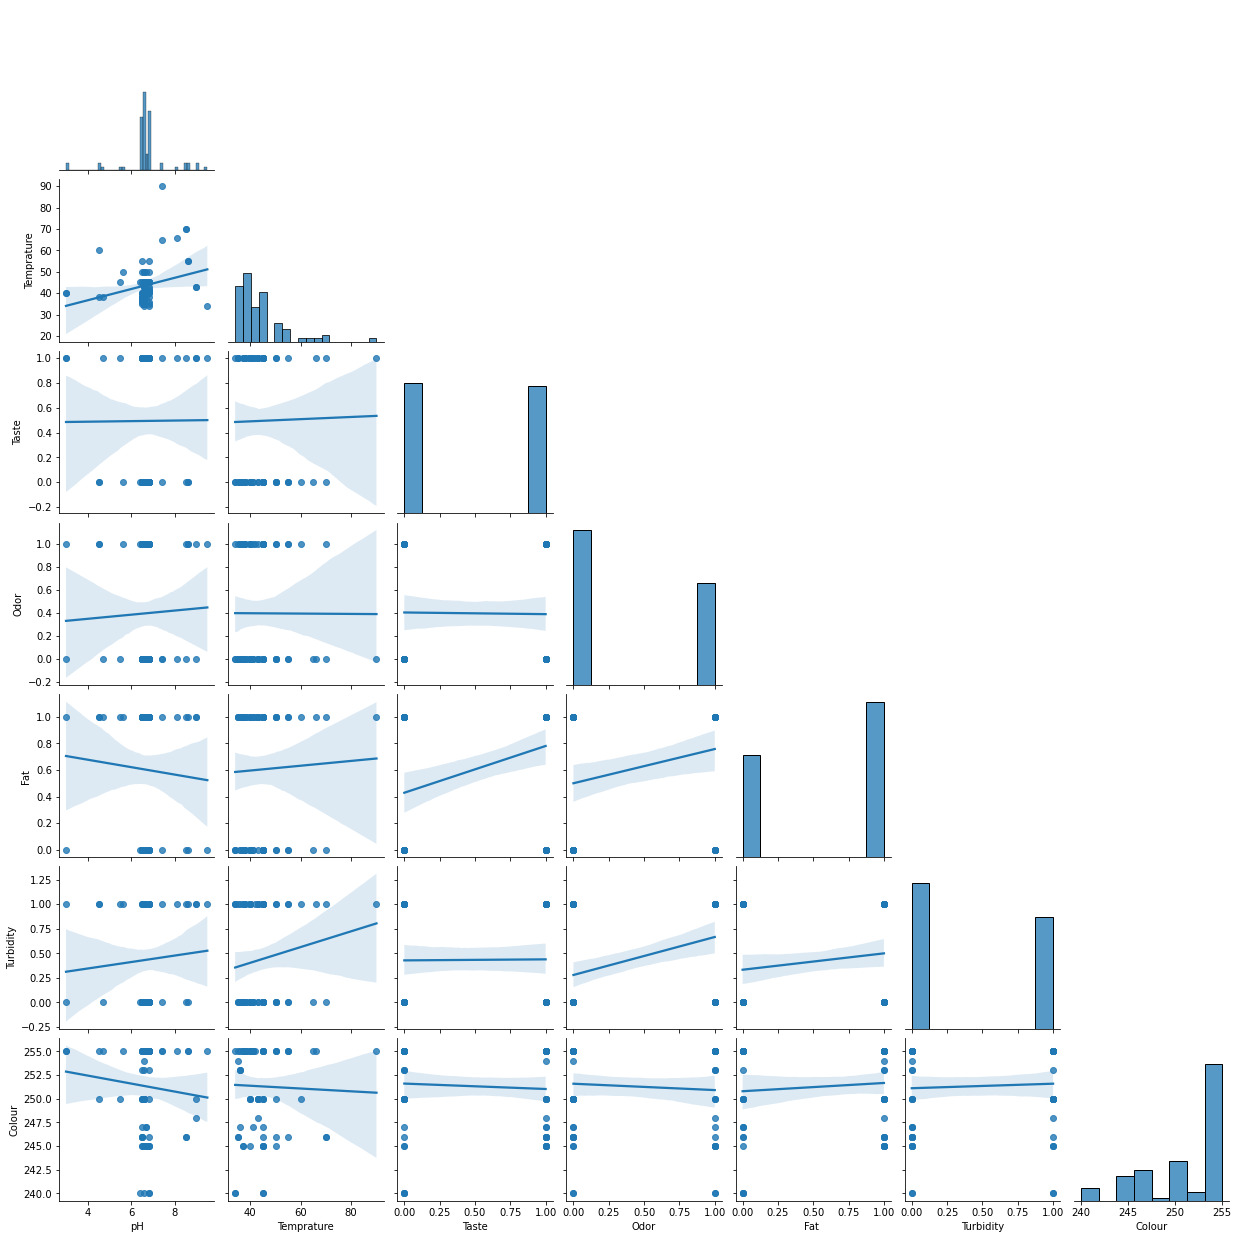

In [12]:
sns.pairplot(data=df, kind="reg", corner=True)

In [13]:
# Build the Model
X = df.drop("Grade", axis=1).values
y = df['Grade'].values

# Logistic Regression

In [14]:
# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [15]:
#Train the Model
reg   = LogisticRegression()
model = reg.fit(X_train,y_train)

In [16]:
# Predicted values
y_pred = model.predict(X_test)
y_pred

array(['medium', 'high', 'high', 'medium', 'high', 'high', 'low',
       'medium', 'low', 'low', 'medium', 'low', 'high', 'medium', 'high',
       'medium', 'medium'], dtype=object)

In [17]:
# Accuracy of Train & Test data set.
print("Accuracy of Train Model is : {:0.2f}".format(reg.score(X_train, y_train)))
print("Accuracy of Test Model is  : {:0.2f}".format(reg.score(X_test, y_test)))

Accuracy of Train Model is : 0.71
Accuracy of Test Model is  : 0.71


In [18]:
# classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        high       0.50      0.75      0.60         4
         low       1.00      0.57      0.73         7
      medium       0.71      0.83      0.77         6

    accuracy                           0.71        17
   macro avg       0.74      0.72      0.70        17
weighted avg       0.78      0.71      0.71        17



# Decision Tree 

In [19]:
dt = DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=4).fit(X_train, y_train)

In [20]:
y_pred = dt.predict(X_test)
y_pred

array(['medium', 'medium', 'high', 'low', 'low', 'low', 'low', 'medium',
       'low', 'low', 'medium', 'low', 'high', 'medium', 'medium',
       'medium', 'medium'], dtype=object)

In [21]:
print("Accuracy of Train Model is : {:0.2f}".format(dt.score(X_train, y_train)))
print("Accuravy of Test Model is  : {:0.2f}".format(dt.score(X_test, y_test)))

Accuracy of Train Model is : 0.86
Accuravy of Test Model is  : 0.82


In [22]:
# Classification Report 
dtc_Report = classification_report(y_test, y_pred)
print(dtc_Report)

              precision    recall  f1-score   support

        high       1.00      0.50      0.67         4
         low       0.86      0.86      0.86         7
      medium       0.75      1.00      0.86         6

    accuracy                           0.82        17
   macro avg       0.87      0.79      0.79        17
weighted avg       0.85      0.82      0.81        17



# Random Forest

In [23]:
rf = RandomForestClassifier(n_estimators=20, random_state=42, max_depth = 5).fit(X_train, y_train)

In [24]:
y_pred = rf.predict(X_test)
y_pred

array(['medium', 'medium', 'high', 'low', 'low', 'high', 'low', 'medium',
       'low', 'low', 'medium', 'low', 'high', 'medium', 'low', 'medium',
       'medium'], dtype=object)

In [25]:
# Accuracy
print("Accuracy of Train Model is : {:0.2f}".format(rf.score(X_train,y_train)))
print("Accuracy of Test Model is  : {:0.2f}".format(rf.score(X_test, y_test)))

Accuracy of Train Model is : 0.97
Accuracy of Test Model is  : 0.94


In [26]:
# Classification Report
rf_report = classification_report(y_test,y_pred)
print(rf_report)

              precision    recall  f1-score   support

        high       1.00      0.75      0.86         4
         low       1.00      1.00      1.00         7
      medium       0.86      1.00      0.92         6

    accuracy                           0.94        17
   macro avg       0.95      0.92      0.93        17
weighted avg       0.95      0.94      0.94        17



# KNN

In [27]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

In [28]:
y_pred = knn_model.predict(X_test)
y_pred

array(['high', 'medium', 'high', 'low', 'high', 'high', 'low', 'medium',
       'low', 'low', 'low', 'low', 'medium', 'high', 'medium', 'medium',
       'medium'], dtype=object)

In [29]:
# Accuracy Score
print("Accuracy of Train Model is : {:0.2f}".format(knn.score(X_train,y_train)))
print("Accuracy of Test Model is  : {:0.2f}".format(knn.score(X_test, y_test)))

Accuracy of Train Model is : 0.80
Accuracy of Test Model is  : 0.65


In [30]:
# Classification Report
knn_report = classification_report(y_test,y_pred)
print(knn_report)

              precision    recall  f1-score   support

        high       0.40      0.50      0.44         4
         low       0.83      0.71      0.77         7
      medium       0.67      0.67      0.67         6

    accuracy                           0.65        17
   macro avg       0.63      0.63      0.63        17
weighted avg       0.67      0.65      0.66        17



### Conclusion:
As per the above analysis we can say that Random Forest Classifier is having higher accuracy score.
So Random Forest Classifier is good fit for classification of " Quality of Milk ".